In [30]:
#Gerekli olan kütüphanelerin tanımlanması
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# Pandasın istenilen sayıda satır ve float kısımda gösterilecek basamak ayarı
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

#float tipi ayarı 16-32-64 olabilir.(16 önerilmez)
tf.keras.backend.set_floatx('float32')

In [31]:
# veri kümesinin okunması.
train_df = pd.read_csv("california_housing_train.csv")
test_df = pd.read_csv("california_housing_test.csv")

# Veri nin değerlerinin ölçeklendirilmesi, veride herhangi bir değişimi neden olmaz sadece ölçeklendirir.
train_df["median_house_value"] /= 1000.0
test_df["median_house_value"] /= 1000.0

# Veririni tanımlanması, incelenmesi.
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [32]:
# validation doğrulu için karıştırma işleminin yapılması 
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [33]:
# Özellikler için boş liste oluşturuyoruz 
feature_columns = []

# Enlem için sayısal sütun oluşturuyoruz ve listeye ekliyoruz.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Boylam için sayısal sütun oluşturuyoruz ve listeye ekliyoruz.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)


# Listeyi model katmanına çeviriyoruz
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [34]:
#model oluşturmak için fonkisyon tanımlıyoruz
def create_model(my_learning_rate, feature_layer):
  
  # sequential modellemesi kullanılıyor basit olduğu için . 
  #https://www.datasciencearth.com/keras-model-wars-sequential-vs-functional/ detaylı anlatıma burdaan ulaşabilirsiniz
  model = tf.keras.models.Sequential()

  # Özellik katmanı ekleniyor
  model.add(feature_layer)


  # tek katman  tek nöronlu bir yapı kullanılıyor ve giriş boyutu belirlenmesi
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

   # Model derleniyor optimizer olarak Kök kare ortolaması tercih ediliyor (Adams daha başarılı) ve loss değerini 
  # ortalamanın, gerçek değer ile farkınıni karesi toplamı  şeklinde buluyor(wikipedia'dan araştırmanızı tavsiye ederim)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):

  # Belirlediğimiz modele  verilen genişlik, tekrar sayısı ve veriler ile uyum sağlatıyoruz

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  
  epochs = history.epoch
  
  # Hata verisini alıyoruz.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   




In [35]:
def plot_the_loss_curve(epochs, rmse):
 #loss değerinin epoch(tekrar) sayısına göre grafiğini çizdiriyoruz

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  



Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 582us/step - loss: 14538.2275 - root_mean_squared_error: 120.5746
Epoch 2/30
170/170 [==============================] - 0s 568us/step - loss: 13535.5742 - root_mean_squared_error: 116.3425
Epoch 3/30
170/170 [==============================] - 0s 568us/step - loss: 13481.9434 - root_mean_squared_error: 116.1118
Epoch 4/30
170/170 [==============================] - 0s 568us/step - loss: 13447.0664 - root_mean_squared_error: 115.9615
Epoch 5/30
170/170 [==============================] - 0s 568us/step - loss: 13393.6328 - root_mean_squared_error: 115.7309
Epoch 6/30
170/170 [==============================] - 0s 568us/step - loss: 13349.9795 - root_mean_squared_error: 115.5421
Epoch 7/30
170/170 [==============================] - 0s 568us/step - loss: 13302.2930 - root_mean_squared_error: 115.3356
Epoch 8/30
170/170 [=========

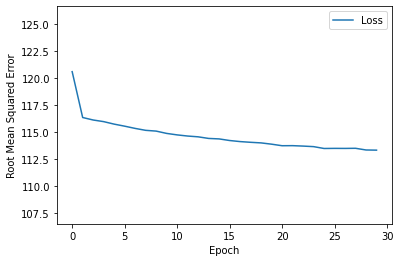

Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 621us/step - loss: 12178.5361 - root_mean_squared_error: 110.3564


[12178.5361328125, 110.35640716552734]

In [36]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

# test verisine göre değerlendirme işlemi 
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Model çıktısına baktığımızda istediğimiz bir çıktı olmadığını kolaylıkla görebiliriz. Bu durumun nedeni enlemleri küsüratlı değerlere sahip olması, yani biz konuma göre bir ortalama değer elde etmek isterken bir bölge olması lazım bir nokta olarak değil. Bu durumu çözmek için her bir aralığı numaralandıracağız örneğin: "0-1" arası 1 numara gibi.

In [37]:
#ne kadar alanı kapsıyacağını ayarlıyoruz
resolution_in_degrees = 1.0 

# Özellikler için boş liste oluşturuyoruz 
feature_columns = []

# Enlem için bucket oluşturuyoruz(aralık kapsamları olarak düşünebiliriz) 
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")

 #np arange komutuyla min'den max'a res değeri aralığında array oluşturuyoruz.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# np arange komutuyla min'den max'a res değeri aralığında array oluşturuyoruz.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Listeyi model katmanına çeviriyoruz
buckets_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 585us/step - loss: 51930.6055 - root_mean_squared_error: 227.8829
Epoch 2/35
170/170 [==============================] - 0s 574us/step - loss: 44569.6250 - root_mean_squared_error: 211.1152
Epoch 3/35
170/170 [==============================] - 0s 591us/step - loss: 38000.1172 - root_mean_squared_error: 194.9362
Epoch 4/35
170/170 [==============================] - 0s 574us/step - loss: 32192.8320 - root_mean_squared_error: 179.4236
Epoch 5/35
170/170 [==============================] - 0s 564us/step - loss: 27177.6250 - root_mean_squared_error: 164.8564
Epoch 6/35
170/170 [==============================] - 0s 563us/step - loss: 22930.5449 - root_mean_squared_error: 151.4283
Epoch 7/35
170/170 [==============================] - 0s 598us/step - loss: 19462.4766 - root_mean_squared_error: 139.5080
Epoch 8/35
170/170 [=========

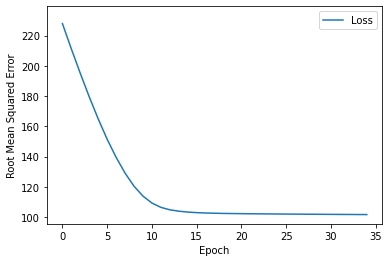

30/30 [==============================] - 0s 655us/step - loss: 12178.5361 - root_mean_squared_error: 110.3564


[12178.5361328125, 110.35640716552734]

In [38]:

learning_rate = 0.04
epochs = 35


my_model1 = create_model(learning_rate, buckets_feature_layer)


epochs, rmse = train_model(my_model1, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

# test verisine göre değerlendirme işlemi 
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Daha iyi bir sonuç elde ettiğizim rmse değerleri incelendiğinde anlaşılmaktadır. Anca böyle ilişkisel verilerde daha iyi hale getirmek için bir seçeneğimiz daha var, bunun adı da çaprazlamadır. Çaprazlama, x ve y kordinatı düşünün değerler şöyle olsun y=2 'yken x in 1-3 arasındaki pozitif değerlerin karşılığı bu dur gibi durumlarda daha iyi sonuç elde etmemizi sağlıyor.

In [39]:
resolution_in_degrees = 1.0 

feature_columns = []

latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)


longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Özellik çaprazlaması
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 675us/step - loss: 53541.7852 - root_mean_squared_error: 231.3910
Epoch 2/35
170/170 [==============================] - 0s 657us/step - loss: 48485.5977 - root_mean_squared_error: 220.1945
Epoch 3/35
170/170 [==============================] - 0s 672us/step - loss: 43816.7695 - root_mean_squared_error: 209.3246
Epoch 4/35
170/170 [==============================] - 0s 657us/step - loss: 39466.4648 - root_mean_squared_error: 198.6617
Epoch 5/35
170/170 [==============================] - 0s 651us/step - loss: 35451.7969 - root_mean_squared_error: 188.2865
Epoch 6/35
170/170 [==============================] - 0s 704us/step - loss: 31768.2559 - root_mean_squared_error: 178.2365
Epoch 7/35
170/170 [==============================] - 0s 722us/step - loss: 28428.5430 - root_mean_squared_error: 168.6077
Epoch 8/35
170/170 [=========

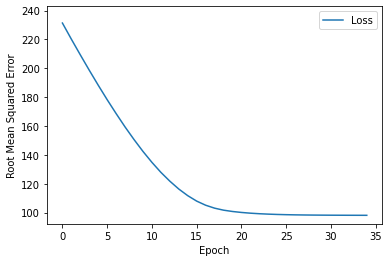


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 1ms/step - loss: 12178.5361 - root_mean_squared_error: 110.3564


[12178.5361328125, 110.35640716552734]

In [42]:

learning_rate = 0.04
epochs = 35


my_model2 = create_model(learning_rate, feature_cross_feature_layer)

epochs, rmse = train_model(my_model2, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)